# Exercises

- Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

#docs
import wrangle_zillow

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. 
e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
# 1. univariate explorate
# - What are the distributions of each variable? 


# 2. Bivariate:
# - Does logerror score vary across fips?


# 3. Bivariate:
# - Is there a relationship between lotsizesquarefeet and logerror?


# 4. Is there a relationship between latitude and logerror?


# multivariate:
# 5. If we control for calculatedfinishedsqft, does logerror differ across tax amount?

# 6. If we control for fullbathcnt, does logerror differ across yearbuilt?

2. Answer those questions through a mix of statistical tests and visualizations.

In [3]:
#Acquire and prep zillow using functions from wrangle
zillow_df = wrangle_zillow.prepare_zillow(wrangle_zillow.get_zillow_data())
zillow_df.head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
0,261.0,14297519,0,0.025595,2017-01-01,1727539,3.5,4.0,3.5,3100.0,...,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential
1,261.0,17052889,1,0.055619,2017-01-01,1387261,1.0,2.0,1.0,1465.0,...,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential
2,261.0,14186244,2,0.005383,2017-01-01,11677,2.0,3.0,2.0,1243.0,...,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential
3,261.0,12177905,3,-0.103410,2017-01-01,2288172,3.0,4.0,3.0,2376.0,...,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential
6,261.0,12095076,6,-0.001011,2017-01-01,781532,3.0,4.0,3.0,2962.0,...,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential


In [4]:
#Looking at column names
zillow_df.columns.tolist()

['propertylandusetypeid',
 'parcelid',
 'id',
 'logerror',
 'transactiondate',
 'id.1',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'propertylandusedesc']

In [5]:
#spilt function
def split_zillow(df, target):
    '''
    this function takes in the zillow dataframe
    splits into train, validate and test subsets
    then splits for X (features) and y (target)
    '''
    # split df into 20% test, 80% train_validate
    train_validate, test = train_test_split(df, test_size=0.2, random_state=1234)
    # split train_validate into 30% validate, 70% train
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=1234)
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [6]:
#Using split function
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test= split_zillow(zillow_df, 'logerror')

In [7]:
# cols = ['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 
#         'longitude', 'poolcnt','propertylandusedesc', 'yearbuilt', 'taxvaluedollarcnt', 'county', 'value_bins']

# 1. Univariate explorate
 - What are the distributions of each variable? 


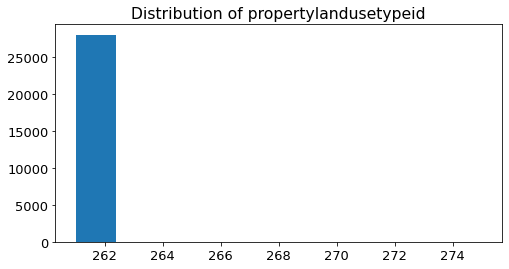

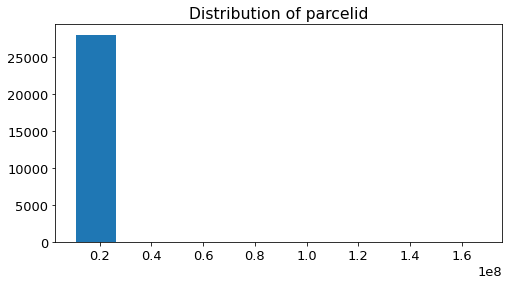

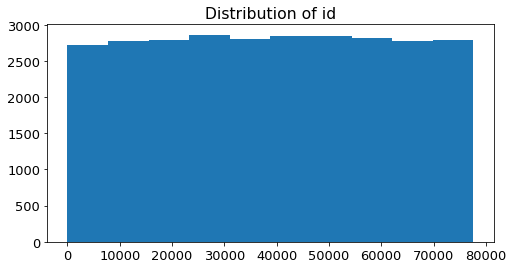

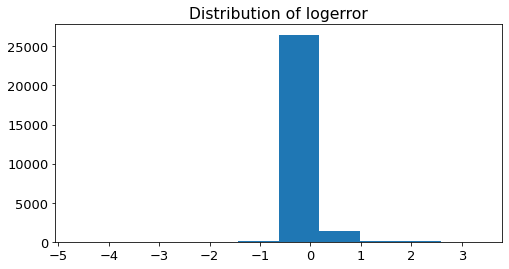

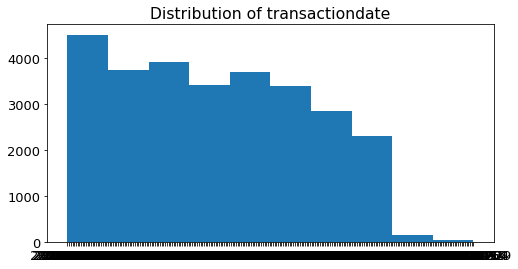

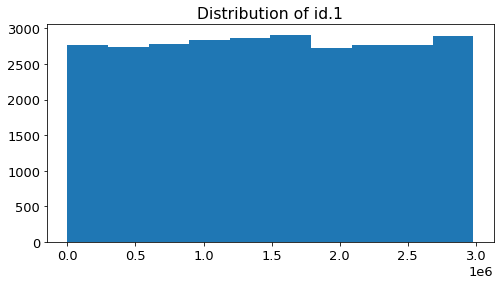

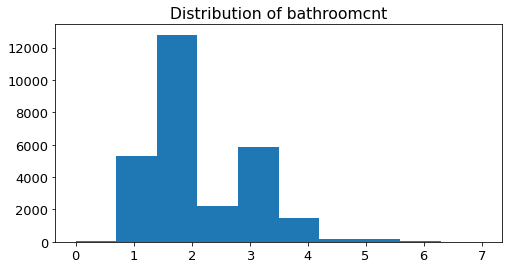

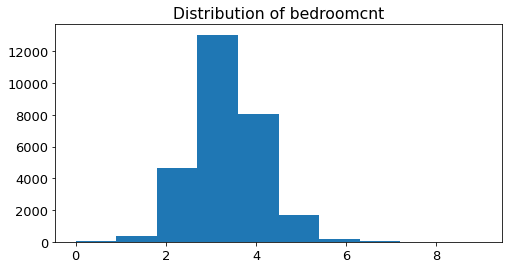

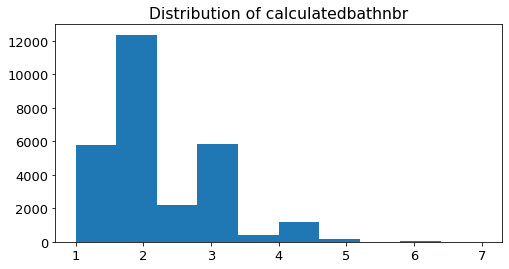

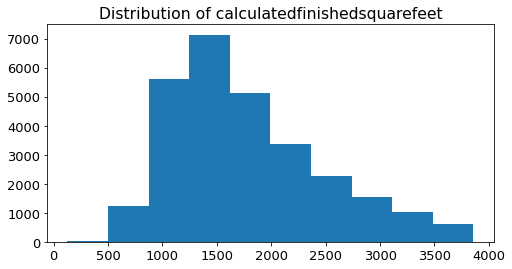

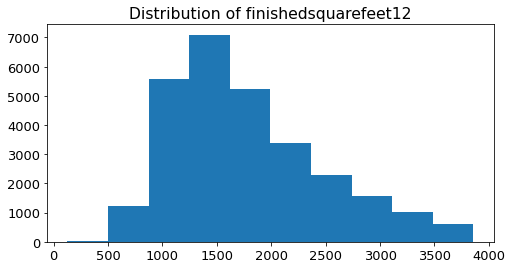

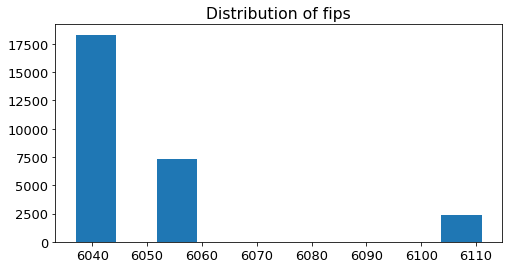

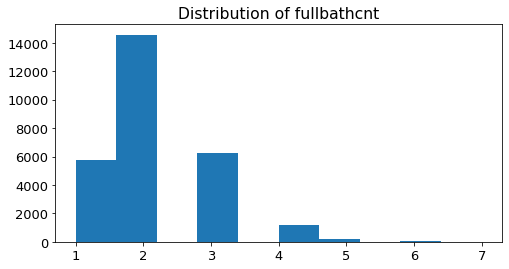

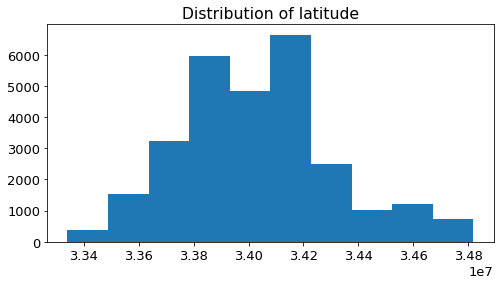

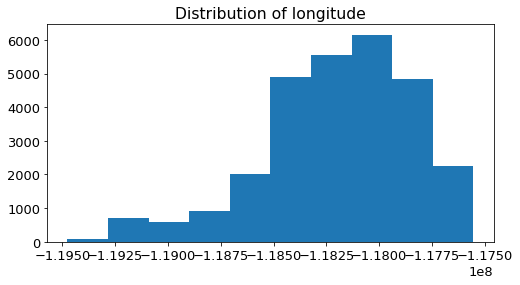

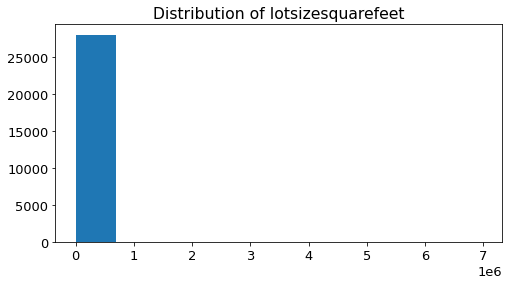

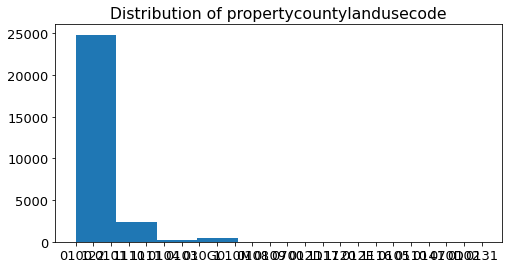

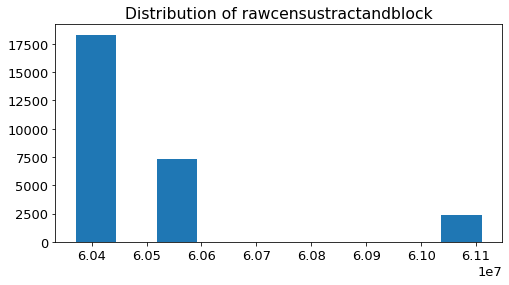

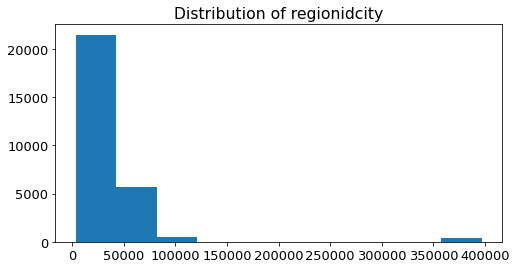

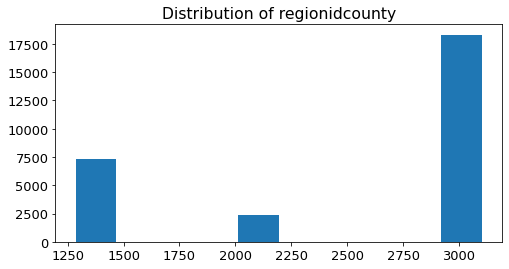

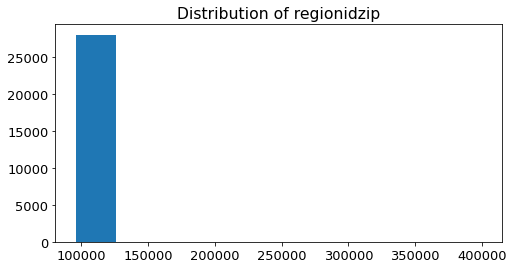

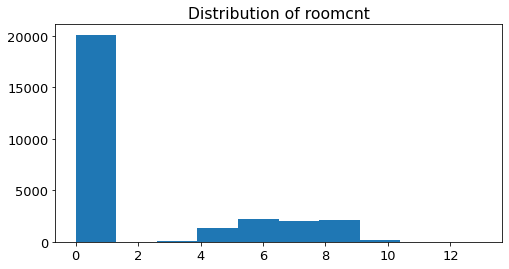

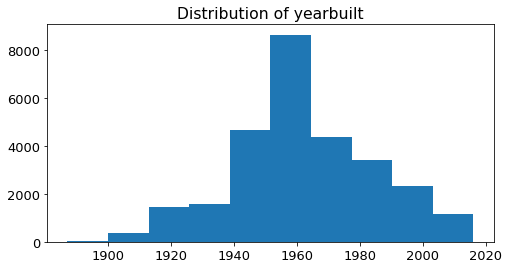

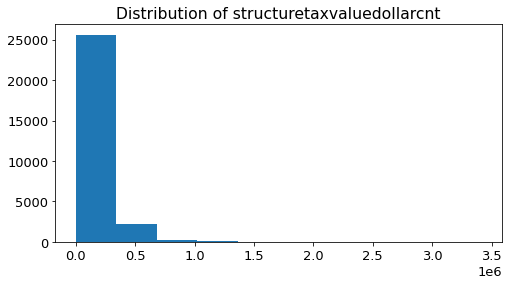

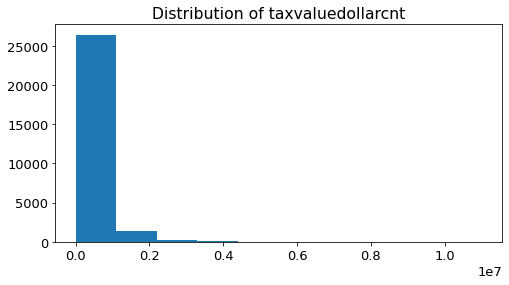

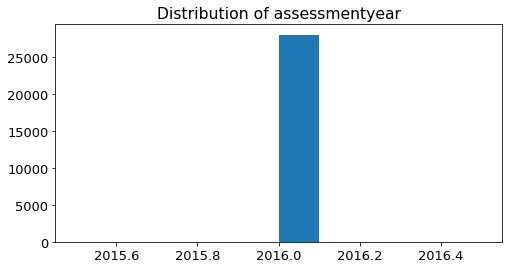

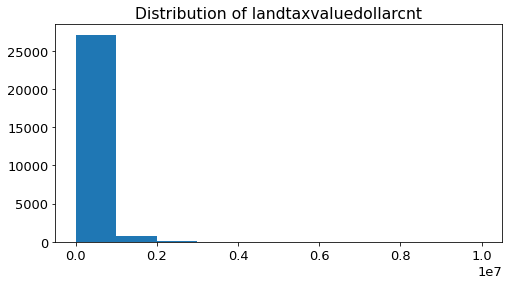

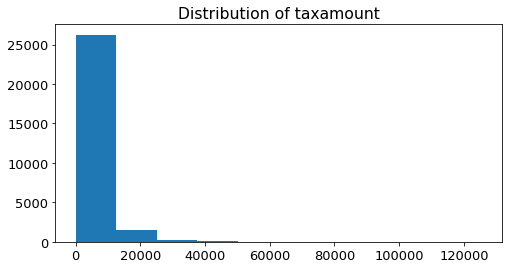

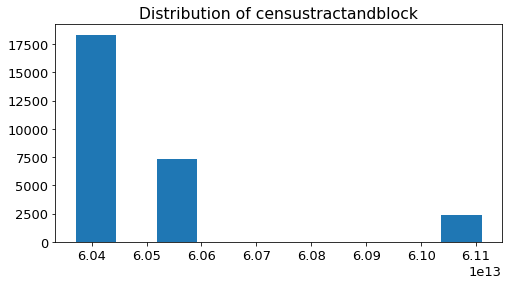

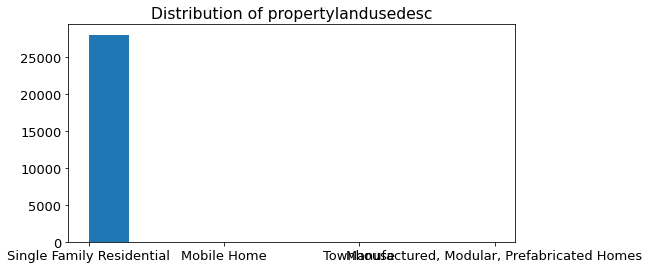

In [8]:
for col in train.columns:
    plt.figure(figsize=(8,4))
    plt.hist(train[col])
    plt.title(f'Distribution of {col}')
    plt.show()

- Takeways:
    - most of the variables do not seem to have normal distribution except for Latitude.


# 2. Bivariate:
 - Does logerror score vary across fips?
 - continous (logerror) and fips (categorical)
 - two sample, two tailed t-tests

In [9]:
# test the assumption of equal variance
stats.levene(train[train.fips <= 6037].logerror, 
             train[train.fips > 6037].logerror
            )

LeveneResult(statistic=42.570772935073165, pvalue=6.9331911699946e-11)

In [10]:
#Mannwhiteneyu test (a type of t-test when not normally distributed)

group1 = train[train.fips <= 6037]['logerror']
group2 = train[train.fips > 6037]['logerror']

stats.mannwhitneyu(group1, group2)

MannwhitneyuResult(statistic=85724884.0, pvalue=1.4409543938363337e-07)

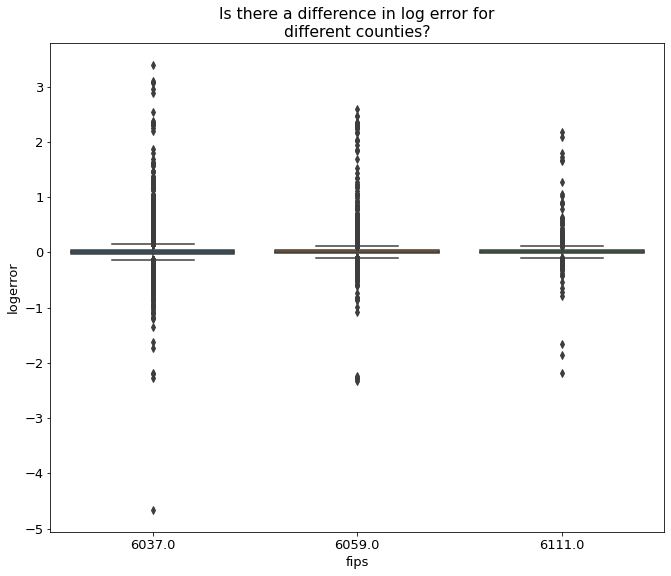

In [11]:
sns.boxplot(train.fips, train.logerror)
plt.title("Is there a difference in log error for\ndifferent counties?")
plt.show()

# 3. Bivariate:
- Is there a relationship between lotsizesquarefeet and logerror?
- continous (logerror) and continous (lotsizesquarefeet)
- pearson r correlation stats test

In [12]:
corr, p = stats.pearsonr(train.logerror, train.lotsizesquarefeet)
print(corr,p)

0.010855439097577423 0.06911007373907152


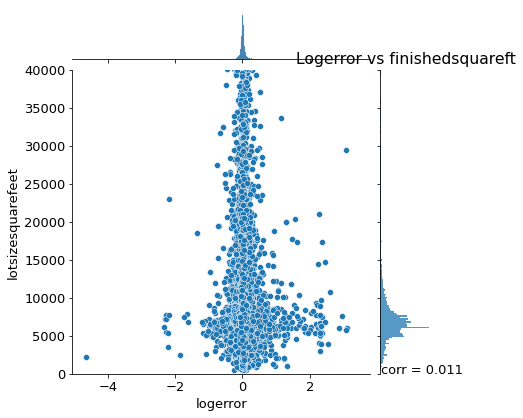

In [13]:
sns.jointplot(x = 'logerror', y = 'lotsizesquarefeet',data = train)
plt.title('Logerror vs finishedsquareft')
plt.ylim(0,40000)
plt.text(8, 80, f'corr = {corr:.3f}')
plt.show()

In [14]:
alpha= 0.05

null = 'There is no relationship between lotsizesquarefeet and logerror'

if p < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we do not reject the null hypothesis, There is no relationship between lotsizesquarefeet and logerror


# 4. Bivariate:
- Is there a relationship between latitude and logerror?
- latitude (continous) and logerror (continous)
- pearson r correlation stats test

In [15]:
corr, p = stats.pearsonr(train.logerror, train.latitude)
print(corr,p)

-0.010528281170981774 0.07791480247136294


<function matplotlib.pyplot.show(close=None, block=None)>

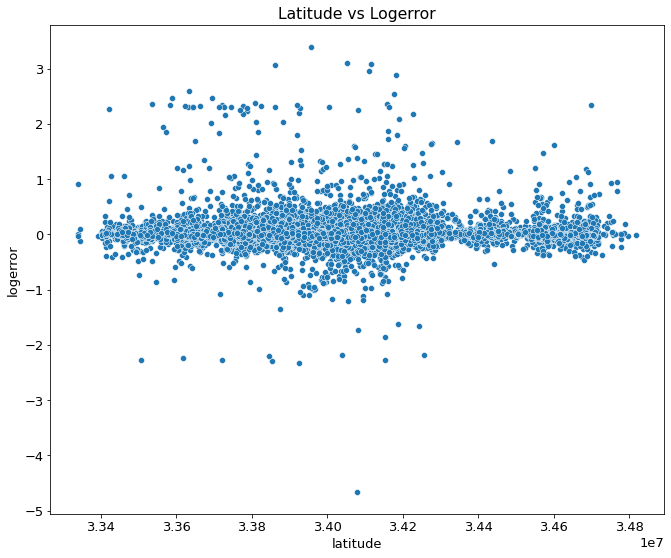

In [16]:
sns.scatterplot(x='latitude', y = 'logerror', data= train)
plt.title('Latitude vs Logerror')
plt.show

In [17]:
alpha= 0.05

null = 'There is no relationship between latitude and logerror'

if p < alpha:
    print(f' we reject the null hypotheis,  {null}')
else:
    print(f' we do not reject the null hypothesis, {null}')

 we do not reject the null hypothesis, There is no relationship between latitude and logerror


# Multivariate:

- 5. If we control for calculatedfinishedsqft, does logerror differ across fips?

- Note: only do visuals for multivariate, do not do stats on multivariate

In [18]:
train['calculatedfinishedsquarefeet'].describe()

count    28039.000000
mean      1776.512643
std        695.682053
min        128.000000
25%       1250.000000
50%       1618.000000
75%       2178.000000
max       3857.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [19]:
train['calculatedfinishedsqft_bin'] = pd.cut(train.calculatedfinishedsquarefeet, [0,2000,3900])

In [20]:
train.head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,calculatedfinishedsqft_bin
70717,261.0,11855240,70747,0.005280,2017-08-28,870183,2.0,3.0,2.0,1359.0,...,0.0,1959.0,102685.0,432367.0,2016.0,329682.0,5959.22,6.037483e+13,Single Family Residential,"(0, 2000]"
39716,261.0,11025072,39733,0.033600,2017-05-25,2045772,1.0,2.0,1.0,744.0,...,0.0,1949.0,80545.0,200947.0,2016.0,120402.0,2579.14,6.037105e+13,Single Family Residential,"(0, 2000]"
24277,261.0,11421274,24290,-0.034953,2017-04-07,2270471,1.0,2.0,1.0,840.0,...,0.0,1941.0,23441.0,246457.0,2016.0,223016.0,3254.68,6.037602e+13,Single Family Residential,"(0, 2000]"
15946,261.0,13927785,15956,-0.027147,2017-03-09,1233642,2.0,3.0,2.0,2043.0,...,7.0,1959.0,102619.0,133912.0,2016.0,31293.0,1825.70,6.059110e+13,Single Family Residential,"(2000, 3900]"
66727,261.0,12807123,66754,-0.147618,2017-08-15,1724432,3.0,5.0,3.0,1647.0,...,0.0,1954.0,110105.0,360910.0,2016.0,250805.0,4646.35,6.037502e+13,Single Family Residential,"(0, 2000]"


In [21]:
train.calculatedfinishedsqft_bin.value_counts()

(0, 2000]       19267
(2000, 3900]     8772
Name: calculatedfinishedsqft_bin, dtype: int64

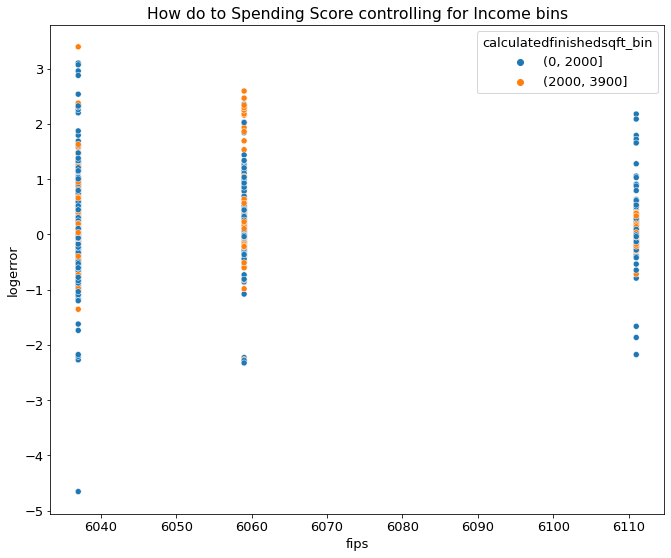

In [22]:
sns.scatterplot(x='fips', y='logerror', data= train, hue= 'calculatedfinishedsqft_bin')
plt.title('How do to Spending Score controlling for Income bins')
plt.show()

- 6. If we control for latitude, does logerror differ across yearbuilt?

In [23]:
train.yearbuilt.describe()

count    28039.000000
mean      1962.420414
std         22.471896
min       1887.000000
25%       1950.000000
50%       1960.000000
75%       1977.000000
max       2016.000000
Name: yearbuilt, dtype: float64

In [24]:
train['year_built_bin'] = pd.cut(train.yearbuilt, [0, 1962, 2016])

In [25]:
train.year_built_bin.value_counts()

(0, 1962]       15480
(1962, 2016]    12559
Name: year_built_bin, dtype: int64

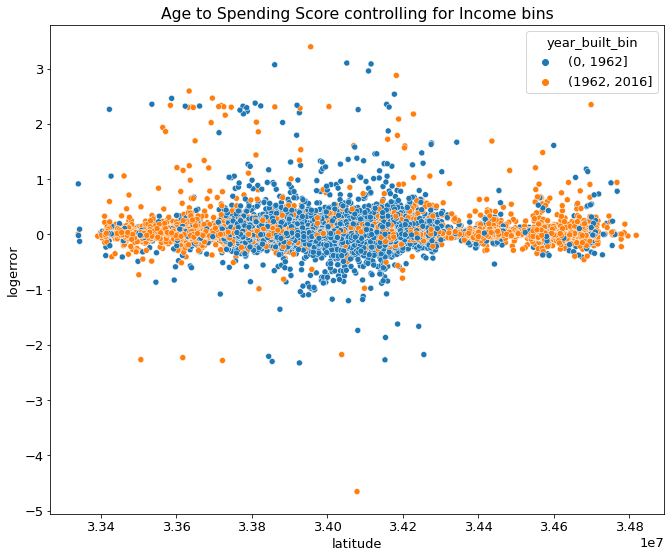

In [26]:
sns.scatterplot(x='latitude', y='logerror', data= train, hue= 'year_built_bin')
plt.title('Age to Spending Score controlling for Income bins')
plt.show()

In [ ]:
sns.pairplot(train, hue='year_built_bin')
plt.show()

In [ ]:
sns.pairplot(train, hue='latitude')
plt.show()

In [ ]:
sns.pairplot(train, hue='logerror')
plt.show()